<h1><center>Analysis of OSMI Mental Health Tech 2016</center></h1>

### **Author**: Julio Cárdenas-Rodríguez, [@julio](https://data.world/julio)
### License: MIT

In [43]:
# modules and authors
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
# load
df = pd.read_csv('https://query.data.world/s/bs6aqtm2l54gty0ng1vsgw37k')

<h1><center>Where do most responders live (Top 10)?</center></h1>

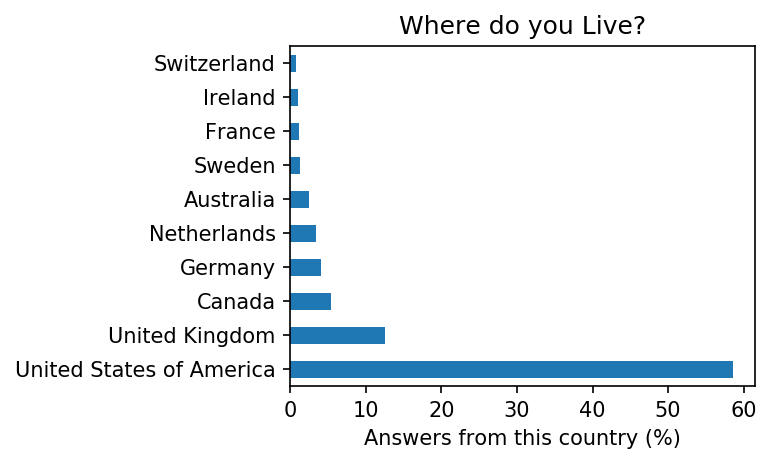

In [45]:
Total_Entries = df['What country do you live in?'].count()

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='w')
df['What country do you live in?'].value_counts().apply(lambda x: x/Total_Entries * 100).iloc[:10].plot.barh()
plt.xlabel('Answers from this country (%)')
plt.title('Where do you Live?')

<h1><center>Where do most responders work (Top 10)?</center></h1>

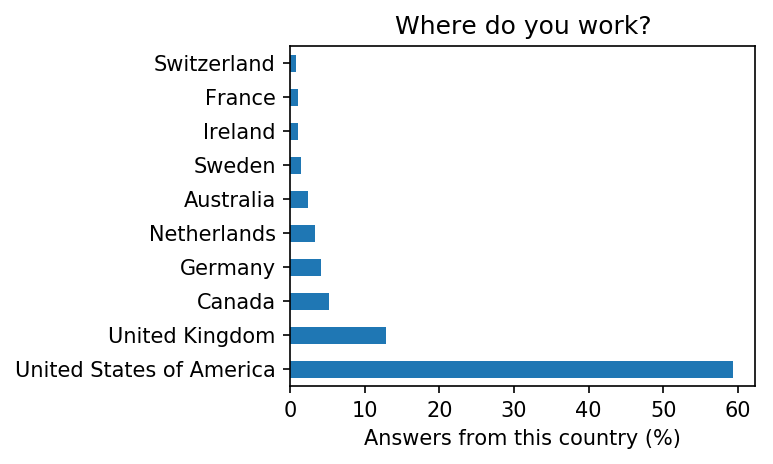

In [46]:
Total_Entries = df['What country do you work in?'].count()

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='w')
df['What country do you work in?'].value_counts().apply(lambda x: x/Total_Entries * 100).iloc[:10].plot.barh()
plt.xlabel('Answers from this country (%)')
plt.title('Where do you work?')

<h1><center>How is gender related to mental health status?</center></h1>

#### Clean Gender Strings

In [156]:
df_status_gender = df[['Do you currently have a mental health disorder?','What is your gender?']].copy()

list_male_genders = ['male','Male ','MALE','Man','man','M','m','male ']
list_female_genders = ['female','female','female ','Female ','FEMALE','Woman','woman','F','f','fm']

for str_ in list_male_genders:
    df_status_gender.replace(str_,'Male',inplace=True)  
    
for str_ in list_female_genders:
    df_status_gender.replace(str_,'Female',inplace=True)

idx = (df['What is your gender?']=='Female') | (df['What is your gender?']=='Male')
df_status_gender = df_status_gender[idx]
df_status_gender['What is your gender?'].value_counts().iloc[:5]
df_status_gender.columns = ['Status','Gender']
df_status_gender['Dummy'] = 1.0
df_status_gender.head(4)

,Status,Gender,Dummy
0,No,Male,1.0
1,Yes,Male,1.0
2,No,Male,1.0
3,Yes,Male,1.0


In [160]:
pd.crosstab(pd.Categorical(df_status_gender.Gender),pd.Categorical(df_status_gender.Status))


col_0,Maybe,No,Yes
row_0,,,
Female,56,97,176
Male,259,423,361


array([<matplotlib.axes._subplots.AxesSubplot object at 0x119ffe828>], dtype=object)

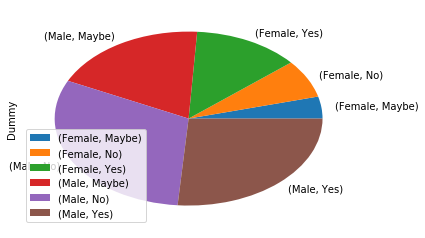

In [149]:
import numpy as np
grouped = df_status_gender.groupby(['Status','Gender'])
grouped.aggregate('count').plot.pie(subplots=True)


In [105]:
pd.pivot_table(df_status_gender, values='What is your gender?',
               columns='Do you currently have a mental health disorder?',
               aggfunc='count')
               

Do you currently have a mental health disorder?
Maybe    315
No       520
Yes      537
Name: What is your gender?, dtype: int64

In [114]:
g= df_status_gender.groupby(['What is your gender?','Do you currently have a mental health disorder?'])
g.head()

,Do you currently have a mental health disorder?,What is your gender?
0,No,Male
1,Yes,Male
2,No,Male
3,Yes,Male
4,Yes,Female
5,Yes,Male
6,No,Male
7,Yes,Female
8,Yes,Female
9,Yes,Male
